# Monte Carlo Simulation, Creutz Algorithm

Alexander Trap, Tomas Mendes

In [1]:
import random
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
import time

## Lennart Jones Potential

We can describe the energy between 2 particles by a Lennart Jones potential.

\begin{equation}V(r)=\left[\frac{1}{r^{12}}-\frac{1}{r^{6}}\right]\end{equation}

The potential plotted in function of the radius between the 2 particles is the following.

In [176]:
def Lennart_Jones(r):
    return 1/r**12-1/r**6

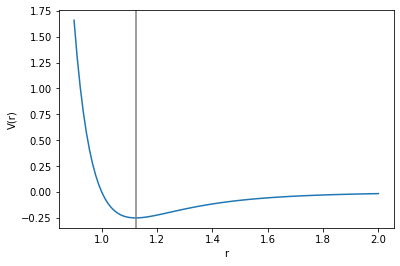

Optimal distance is when r= [1.12222222]


In [189]:
r=np.linspace(0.9,2,num=100)
plt.plot(r,Lennart_Jones(r))
plt.xlabel('r')
plt.ylabel('V(r)')
ind=[i for i, v in enumerate(Lennart_Jones(r)) if v == min(Lennart_Jones(r))]
min_r=r[ind]

plt.axvline(x=min_r, color='grey')
plt.show()
print('Optimal distance is when r=', min_r)

## 1D

In 1-dimension we will simulate a random configuration of particles on a line with just an x-coordinate. Then we will make one randomly chosen particle move and see if the configuration gives a lower energy or not. If it does give a lower energy, this is a right step towards finding the minimal energy and we give the remaining energy to the demon. If it give a higher energy we make another randomly shake to the cluster. In this way the cluster moves to a minimum, but it may be a local minimum.
Let us see.

In [65]:
N=5 #number of particles
size=10
coord_particles=[random.uniform(0,10) for i in range(N)] #x-coordinate
delta=0.01

In [3]:
def distance(r1, r2):
    return r1-r2

In [4]:
def Lennart_Jones(r):
    return 1/r**12-1/r**6

In [5]:
def Potential(coord):
    V_ij=[]
    for i in range(len(coord)):
        for j in range(len(coord)):
            if i != j:
                V_ij=np.append(V_ij, Lennart_Jones(distance(coord[i], coord[j])))
            else:
                pass
    return 1/2*sum(V_ij)

In [6]:
def pm():
    return 1 if random.random() < 0.5 else -1

In [7]:
#this function will 'shake' the system into a different one, one randaom particle is moved in a random direction

def push(coord_vector):
    i=randrange(0,N)
    coord_vector_prime=np.copy(coord_vector)
    coord_vector_prime[i]=coord_vector_prime[i]+pm()*delta
    return [coord_vector_prime,i]

In [8]:
def Creutz(iterations, coord_p):
    
    coord_particles=np.copy(coord_p)
    E_D=0
    
    V=Potential(coord_particles)
    
    E=[V]
    ED=[E_D]
    
    for i in range(iterations):
        x=push(coord_particles)
        coord_prime=x[0]
        V_prime=Potential(coord_prime)
        Delta_E=V_prime-V
        
        if Delta_E<0 and 0<=coord_prime[x[1]]<=10: #the second condition says that the partcile cant go over the edge of the box
            coord_particles=coord_prime
            E_D=E_D-Delta_E
            
            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)
            
            V=V_prime
#         elif E_D >= Delta_E and 0<=coord_prime[x[1]]<=10:
#             coord_particles=coord_prime
#             E_D=E_D-Delta_E

#             E=np.append(E, V_prime)
#             ED=np.append(ED, E_D)

#             V=V_prime
        else:
            pass
    percentage=len(ED)/iterations
    return(E, ED, percentage, len(ED), coord_particles)    

In [66]:
N=5 #number of particles
size=10
coord_particles=[random.uniform(0,10) for i in range(N)] #x-coordinate

it=10000

toc= time.time()
C=Creutz(it, coord_particles)
tic= time.time()
it=np.arange(len(C[0]))
T=tic-toc
print ('Time:', T,'s')

Time: 1.2488911151885986 s


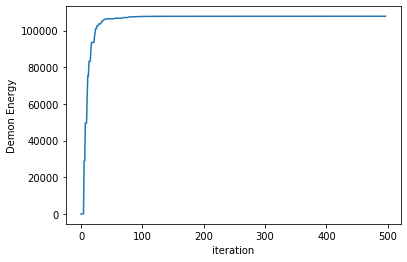

Number of iterations: 497


In [67]:
plt.plot(it,C[1])
plt.xlabel('iteration')
plt.ylabel('Demon Energy')
plt.show()
print('Number of iterations:', C[3])

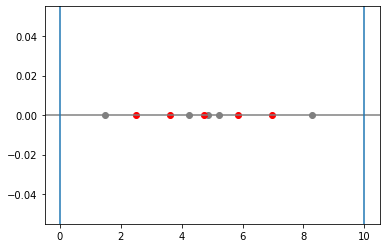

x-coördinates of particles: [4.73997521 3.62224917 2.50531037 5.8606644  6.98039246]


In [68]:
plt.plot(coord_particles,np.zeros(N),'o',color='grey')
plt.plot(C[4],np.zeros(N),'o',color='red')
plt.axhline(y=0,color='grey')
plt.axvline(x=0)
plt.axvline(x=10)
plt.show()
print('x-coördinates of particles:', C[4])

Grey dots are the begin positions and red the end positions.
We see that the particles each would like to be in a radiance of 1.12 to the nearest neighbour. Not suprising since this is what we saw in the 2 particle system. This is a global minimum.

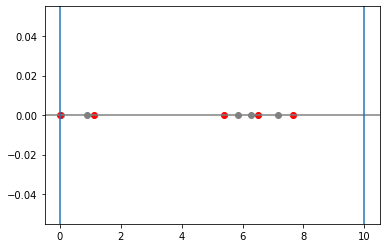

x-coördinates of particles: [7.64652285e+00 5.40345287e+00 6.52393185e+00 1.12604982e+00
 3.69129557e-03]


In [51]:
N=5 #number of particles
size=10
coord_particles=[random.uniform(0,10) for i in range(N)] #x-coordinate

it=10000
C=Creutz(it, coord_particles)

plt.plot(coord_particles,np.zeros(N),'o',color='grey')
plt.plot(C[4],np.zeros(N),'o',color='red')
plt.axhline(y=0,color='grey')
plt.axvline(x=0)
plt.axvline(x=10)

plt.show()
print('x-coördinates of particles:', C[4])

This is an example of a local minimum, we have 2 clusters.

Now, let's see what the 'real' Creutz algoritm does. Instead of skipping the energies that result in a higher energy than the previous one we will alow this. The total energy remains unchanged so we need to see if the new energy is lower than the total energy OR if there is enough energy available by the Demon to provide the change in energy. In this way the system can, in principle undergo every possible state available.

In [90]:
def Creutz2(iterations, coord_p):
    
    coord_particles=np.copy(coord_p)
    E_D=0
    
    V=Potential(coord_particles)
    
    E=[V]
    ED=[E_D]
    
    min_V=V
    min_coord=coord_particles
    
    for i in range(iterations):
        E=V+E_D
        x=push(coord_particles)
        
        coord_prime=x[0]
        V_prime=Potential(coord_prime)
        E_prime=V_prime+E_D
        
        Delta_E=V_prime-V
        
        if Delta_E<0 and 0<=coord_prime[x[1]]<=10: #the second condition says that the particle cant go over the edge of the box
            coord_particles=coord_prime
            E_D=E_D-Delta_E
            
            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)
            
            V=V_prime
            
            if V<min_V:
                min_V=V
                min_coord=coord_particles    #if it give a lower energy for the particles than the previously lowest, we save this configuration.
            
        elif E_D >= Delta_E and 0<=coord_prime[x[1]]<=10:
            coord_particles=coord_prime
            E_D=E_D-Delta_E

            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)

            V=V_prime
        else:
            pass
    percentage=len(ED)/iterations
    return(E, ED, percentage, len(ED), coord_particles, min_V, min_coord)    

In [122]:
N=10 #number of particles
size=10
coord_particles=[random.uniform(0,10) for i in range(N)] #x-coordinate
delta=0.1 #A smaller delta would give more accurate results, but there is a computational limit

it=100000

toc= time.time()
C=Creutz2(it, coord_particles)
tic= time.time()
T=tic-toc

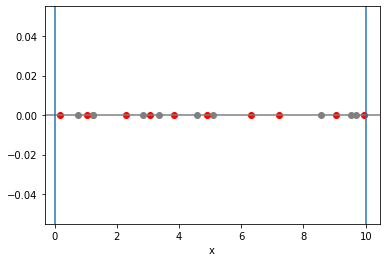

x-coördinates of particles: [9.04856517 3.83013841 4.89025368 6.32727855 2.28727962 3.06890256
 9.95306457 1.03027356 7.22296452 0.17388682]
Iterations: 98564
Time: 63.06778836250305
Percentage: 0.98564


In [127]:
plt.plot(coord_particles,np.zeros(N),'o',color='grey')
plt.plot(C[6],np.zeros(N),'o',color='red')
plt.axhline(y=0,color='grey')
plt.axvline(x=0)
plt.axvline(x=10)
plt.xlabel('x')
plt.show()
print('x-coördinates of particles:', C[6])
print('Iterations:', C[3])
print('Time:', T)
print('Percentage:', C[2])

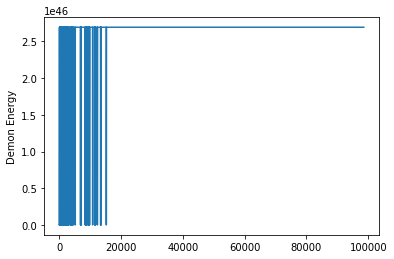

In [124]:
plt.plot(np.arange(len(C[1])), C[1])
plt.ylabel('Demon Energy')
plt.show()

Here we can see that the demon energy stabelizes after certain point of iterations! We reached the minimum. The space of 1.12 is not reached because we have 10 particles and 10*1.12>10 so this is the ideal configuration.

# 2D

We can easily expand this problem to 2-dimensions, all we have to do is adding one extra degree of freedom. We pose the coordinates as a matrix with on the x-coordinates as the first column and the y coordinates as the second column.

In [130]:
def R(coord1,coord2):
    return (sum(np.square(coord1-coord2)))**(1/2)

In [131]:
def Potential(coord):
    V_ij=[]
    for i in range(len(coord[:,0])):
        for j in range(len(coord[:,0])):
            if i != j:
                V_ij=np.append(V_ij, Lennart_Jones(R(coord[i,:], coord[j,:])))
            else:
                pass
    return 1/2*sum(V_ij)
    

In [132]:
def push(coord_matrix):
    i=randrange(N)
    direction=randrange(0,2)
    coord_matrix[i,direction] #choose a random direction, horizontal or vertical.
    coord_matrix_prime=np.copy(coord_matrix)
    coord_matrix_prime[i,direction]=coord_matrix_prime[i,direction]+pm()*delta
    return [coord_matrix_prime,i, direction]

In [133]:
def Creutz(iterations, coord_p):
    
    coord_particles=np.copy(coord_p)
    E_D=0
    
    V=Potential(coord_particles)
    
    E=[V]
    ED=[E_D]
    
    for i in range(iterations):
        xy=push(coord_particles)
        coord_prime=xy[0]
        V_prime=Potential(coord_prime)
        Delta_E=V_prime-V
        
        if Delta_E<0 and 0<=coord_prime[xy[1],xy[2]]<=10: #V_prime<V:
            coord_particles=coord_prime
            E_D=E_D-Delta_E
            
            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)
            
            V=V_prime
#         elif E_D >= Delta_E and 0<=coord_prime[xy[1],xy[2]]<=10:
#             coord_particles=coord_prime
#             E_D=E_D-Delta_E

#             E=np.append(E, V_prime)
#             ED=np.append(ED, E_D)

#             V=V_prime
        else:
            pass
    percentage=len(ED)/iterations
    return(E, ED, percentage, len(ED), coord_particles)
    
    

In [150]:
N=16
delta=0.01
coord_x=[random.uniform(0,1)+5 for i in range(N)]
coord_y=[random.uniform(0,1)+5 for i in range(N)]
coord_xy=np.append(coord_x,coord_y).reshape(2,N)
coord_xy=np.transpose(coord_xy)

In [154]:
it=10000

toc= time.time()
C=Creutz(it, coord_xy)
tic= time.time()
it=np.arange(len(C[0]))
tic-toc

23.11494469642639

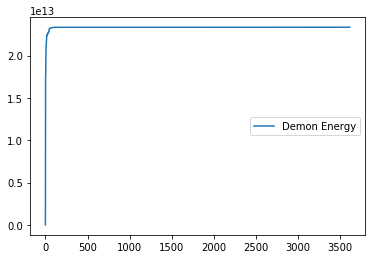

In [155]:
plt.plot(it,C[1], label="Demon Energy")
plt.legend(loc="right")
plt.show()

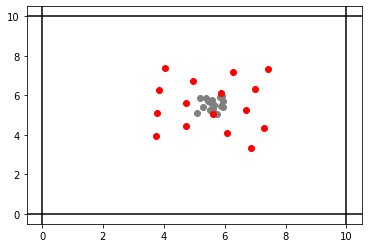

In [156]:
plt.plot(coord_xy[:,0],coord_xy[:,1],'o',color='grey')
min_cds=C[4]
plt.plot(min_cds[:,0],min_cds[:,1],'o', color='red')
plt.axhline(y=0,color='black')
plt.axhline(y=10,color='black')
plt.axvline(x=0,color='black')
plt.axvline(x=10,color='black')
plt.show()

Once again we see that the system tries to find a nearest neighbour distance of r=1.12

In [142]:
def Creutz2(iterations, coord_p):
    
    coord_particles=np.copy(coord_p)
    E_D=0
    
    V=Potential(coord_particles)
    
    E=[V]
    ED=[E_D]
    
    min_V=V
    min_coord=coord_particles
    
    for i in range(iterations):
        E=V+E_D
        xy=push(coord_particles)
        
        coord_prime=xy[0]
        V_prime=Potential(coord_prime)
        E_prime=V_prime+E_D
        
        Delta_E=V_prime-V
        
        if Delta_E<0 and 0<=coord_prime[xy[1],xy[2]]<=10: #the second condition says that the particle cant go over the edge of the box
            coord_particles=coord_prime
            E_D=E_D-Delta_E
            
            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)
            
            V=V_prime
            
            if V<min_V:
                min_V=V
                min_coord=coord_particles    #if it give a lower energy for the particles than the previously lowest, we save this configuration.
            
        elif E_D >= Delta_E and 0<=coord_prime[xy[1],xy[2]]<=10:
            coord_particles=coord_prime
            E_D=E_D-Delta_E

            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)

            V=V_prime
        else:
            pass
    percentage=len(ED)/iterations
    return(E, ED, percentage, len(ED), coord_particles, min_V, min_coord)    

In [160]:
N=9
delta=0.2
coord_x=[random.uniform(0,1)+5 for i in range(N)]
coord_y=[random.uniform(0,1)+5 for i in range(N)]
coord_xy=np.append(coord_x,coord_y).reshape(2,N)
coord_xy=np.transpose(coord_xy)

it=100000

toc= time.time()
C=Creutz2(it, coord_xy)
tic= time.time()
tic-toc

85.3738317489624

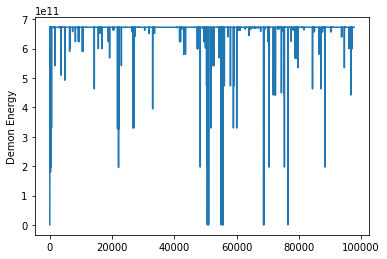

In [162]:
plt.plot(np.arange(len(C[1])), C[1])
plt.ylabel('Demon Energy')
plt.show()

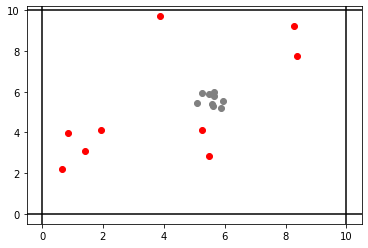

In [164]:
plt.plot(coord_xy[:,0],coord_xy[:,1],'o',color='grey')
min_cds=C[6]
plt.plot(min_cds[:,0],min_cds[:,1],'o', color='red')
plt.axhline(y=0,color='black')
plt.axhline(y=10,color='black')
plt.axvline(x=0,color='black')
plt.axvline(x=10,color='black')
plt.show()

The number of iteration must be very much larger to achive the global minumum because of the extra degree of freedom. But we can see here 4 clusters, this is a local minimum.

# 3D

Now it is very easy to expand to 3D, just one extra degree of freedom. We will not do the 'real' Creutz algoritm because we already needed many more iterations in 2D.

In [165]:
N=4
coord_x=[random.uniform(0.2,9.8) for i in range(N)]
coord_y=[random.uniform(0.2,9.8) for i in range(N)]
coord_z=[random.uniform(0.2,9.8) for i in range(N)]
coord_xy=np.append(coord_x,coord_y)
coord_xyz=np.append(coord_xy,coord_z).reshape(3,N)
coord_xyz=np.transpose(coord_xyz)

In [135]:
def R(coord1,coord2):
    return (sum(np.square(coord1-coord2)))**(1/2)

In [166]:
def Potential(coord):
    V_ij=[]
    for i in range(len(coord[:,0])):
        for j in range(len(coord[:,0])):
            if i != j:
                V_ij=np.append(V_ij, Lennart_Jones(R(coord[i,:], coord[j,:])))
            else:
                pass
    return 1/2*sum(V_ij)

In [167]:
def push(coord_matrix):
    i=randrange(N)
    direction=randrange(0,3)
    coord_matrix[i,direction]
    coord_matrix_prime=np.copy(coord_matrix)
    coord_matrix_prime[i,direction]=coord_matrix_prime[i,direction]+pm()*delta
    return [coord_matrix_prime,i, direction]

In [168]:
def Creutz(iterations, coord_p):
    
    coord_particles=np.copy(coord_p)
    E_D=0
    
    V=Potential(coord_particles)
    
    E=[V]
    ED=[E_D]
    
    for i in range(iterations):
        xy=push(coord_particles)
        coord_prime=xy[0]
        V_prime=Potential(coord_prime)
        Delta_E=V_prime-V
        
        if Delta_E<0 and 0<=coord_prime[xy[1],xy[2]]<=10: #V_prime<V:
            coord_particles=coord_prime
            E_D=E_D-Delta_E
            
            E=np.append(E, V_prime)
            ED=np.append(ED, E_D)
            
            V=V_prime
#         elif E_D >= Delta_E and 0<=coord_prime[xy[1],xy[2]]<=10:
#             coord_particles=coord_prime
#             E_D=E_D-Delta_E

#             E=np.append(E, V_prime)
#             ED=np.append(ED, E_D)

#             V=V_prime
        else:
            pass
    percentage=len(ED)/iterations
    return(E, ED, percentage, len(ED), coord_particles)

In [169]:
N=3**3
delta=0.1
coord_x=[random.uniform(0,10) for i in range(N)]
coord_y=[random.uniform(0,10) for i in range(N)]
coord_z=[random.uniform(0,10) for i in range(N)]
coord_xy=np.append(coord_x,coord_y)
coord_xyz=np.append(coord_xy,coord_z).reshape(3,N)
coord_xyz=np.transpose(coord_xyz)

In [170]:
it=10000

toc= time.time()
C=Creutz(it, coord_xyz)
tic= time.time()
it=np.arange(len(C[0]))
tic-toc

76.16591930389404

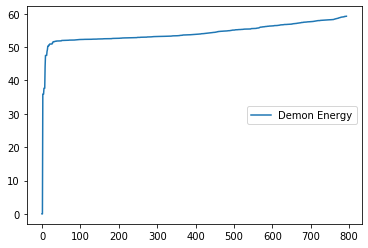

In [171]:
plt.plot(it,C[1], label="Demon Energy")
plt.legend(loc="right")
plt.show()

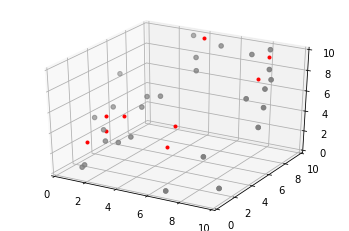

In [172]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coord_xyz[:,0],coord_xyz[:,1],coord_xyz[:,1], '.',color='grey')
ax.scatter(coord_xyz[:,0],coord_xyz[:,1],coord_xyz[:,1], '.',color='grey')
plt.plot(min_cds[:,0],min_cds[:,1],min_cds[:,1],'.', color='red')
min_cds=C[4]
# plt.plot(min_cds[:,0],min_cds[:,1],min_cds[:,1],'o', color='red')
ax.set_xlim3d(0, 10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(0,10)
plt.show()

Below a histogram of every distances between the particles. I know it I count double but since I am making a histogram is does not really matter. It is just to give an idea.

In [173]:
All_R=[]
for i in range(len(min_cds[:,1])):
    for j in range(len(min_cds[:,1])):
        if i!=j:
            All_R=np.append(All_R,R(min_cds[i,:],min_cds[j,:]))
    

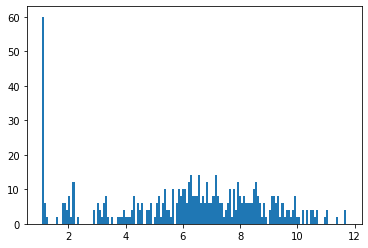

In [174]:
plt.hist(All_R,150)
plt.show()

As can be seen in the above histogram, the system always converges to a configuration where most of the particles are in the ideal configuration where most distances between the particle are R=1.12.